In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
celeba_bldr=tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
datasets = celeba_bldr.as_dataset(shuffle_files=False)
datasets.keys()

2023-03-06 01:09:58.332083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


dict_keys(['train', 'validation', 'test'])

In [3]:
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': bool,
        'Arched_Eyebrows': bool,
        'Attractive': bool,
        'Bags_Under_Eyes': bool,
        'Bald': bool,
        'Bangs': bool,
        'Big_Lips': bool,
        'Big_Nose': bool,
        'Black_Hair': bool,
        'Blond_Hair': bool,
        'Blurry': bool,
        'Brown_Hair': bool,
        'Bushy_Eyebrows': bool,
        'Chubby': bool,
        'Double_Chin': bool,
        'Eyeglasses': bool,
        'Goatee': bool,
        'Gray_Hair': bool,
        'Heavy_Makeup': bool,
        'High_Cheekbones': bool,
        'Male': bool,
        'Mouth_Slightly_Open': bool,
        'Mustache': bool,
        'Narrow_Eyes': bool,
        'No_Beard': bool,
        'Oval_Face': bool,
        'Pale_Skin': bool,
        'Pointy_Nose': bool,
        'Receding_Hairline': bool,
        'Rosy_Cheeks': bool,
        'Sideburns': bool,
        'Smiling': bool,
        'Straight_Hair': bool,
        'Wavy_Hair': b

In [4]:
print(celeba_bldr.info.features['image'])

Image(shape=(218, 178, 3), dtype=uint8)


In [5]:
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [6]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}


In [7]:
ds_train = datasets['train']
ds_train = ds_train.map(lambda item: (item['image'], tf.cast(item['attributes']['Male'],tf.uint32)))

ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))
print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1], shape=(18,), dtype=uint32)


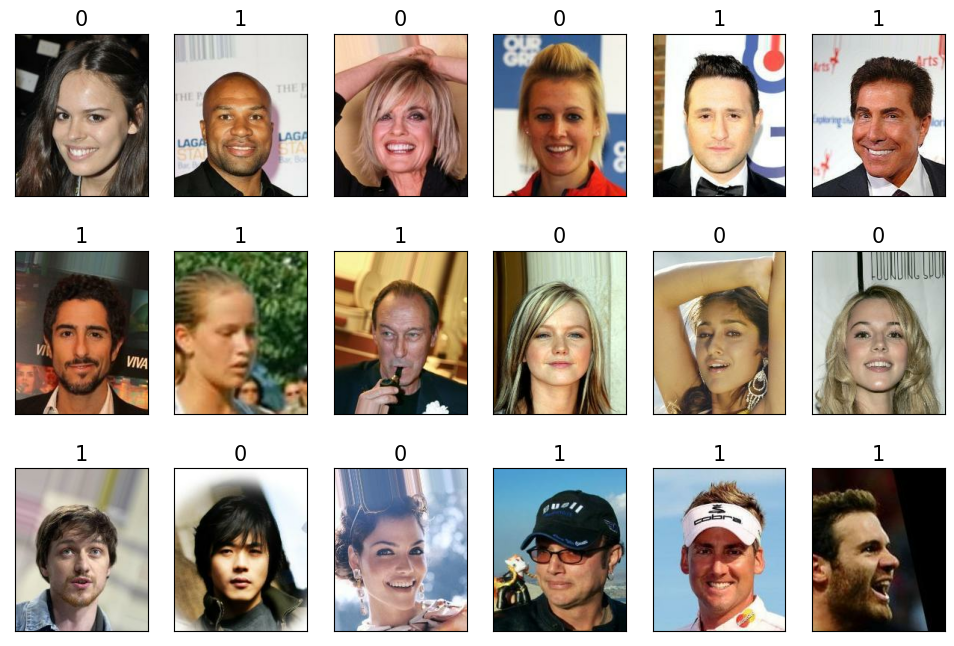

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
for i, (image,label) in enumerate (zip(images,labels)):
    ax = fig.add_subplot(3,6,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
plt.show()

In [9]:
ds_train = datasets['train']
ds_train = ds_train.map(lambda item: (item['image'], tf.cast(item['attributes']['Male'],tf.uint32)))
ds_train = ds_train.batch(1000)
ds_train_first_chunk = next(iter(ds_train))

In [10]:
X_train = ds_train_first_chunk[0]
X_train = tf.cast(X_train,tf.float32)
X_train /= 255.0
X_train = X_train.numpy()
X_train = np.reshape(X_train,(1000,116412))
X_train.shape

(1000, 116412)

In [11]:
y_train  = ds_train_first_chunk[1].numpy()
y_train.shape

(1000,)

In [12]:
ds_valid = datasets['validation']
ds_valid = ds_valid.map(lambda item: (item['image'], tf.cast(item['attributes']['Male'],tf.uint32)))
ds_valid = ds_valid.batch(1000)
ds_valid_first_chunk = next(iter(ds_valid))

In [13]:
X_valid = ds_valid_first_chunk[0]
X_valid = tf.cast(X_valid,tf.float32)
X_valid /= 255.0
X_valid = X_valid.numpy()
X_valid = np.reshape(X_valid,(1000,116412))
X_valid.shape

(1000, 116412)

In [14]:
y_valid  = ds_valid_first_chunk[1].numpy()
y_valid.shape

(1000,)

In [22]:
from neuro import NeuralNetMLP
nn = NeuralNetMLP(n_hidden = 1000, l2 = 0.02,epochs = 15,eta=0.0005,minibatch_size = 200, shuffle = True, seed = 1)

In [23]:
nn.fit(X_train = X_train, y_train = y_train, X_valid = X_valid,y_valid=y_valid)

2 classes identified
116412 features identified



15/15 | Cost: 25066.67 | Train/Valid Acc.: 47.40%/48.70% 

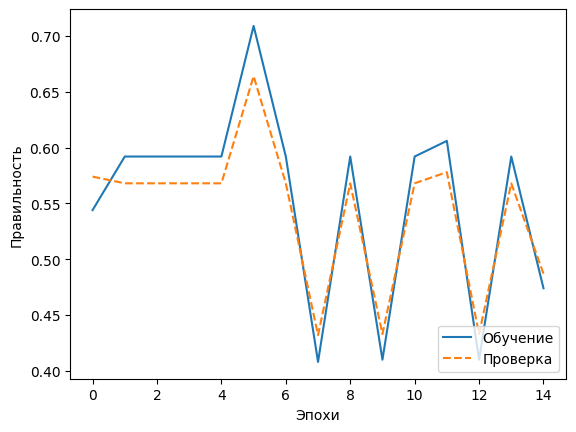

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs),nn.eval_['train_acc'],label = 'Обучение')
plt.plot(range(nn.epochs),nn.eval_['valid_acc'],label = 'Проверка', linestyle ='--')
plt.ylabel('Правильность')
plt.xlabel('Эпохи')
plt.legend(loc='lower right')
plt.show()